<a href="https://colab.research.google.com/github/iimog/master-bioinf-lecture/blob/main/WS_2024/2_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Cats vs Dogs

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [ ]:
files = get_image_files(path/"images")

In [ ]:
files

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_133.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_133.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_271.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_3.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_81.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_95.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_77.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_126.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_40.jpg')...]

In [ ]:
import skimage as ski
import matplotlib.pyplot as plt

In [ ]:
image = ski.io.imread(files[1])
image.shape

(333, 500, 3)

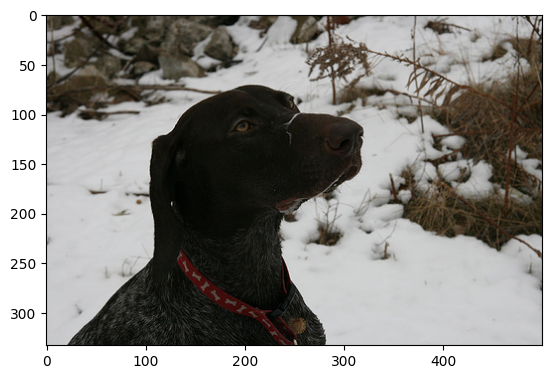

In [ ]:
plt.imshow(image)

In [ ]:
def cat_or_dog(filename):
  if filename[0].isupper():
    return "cat"
  else:
    return "dog"

In [ ]:
cat_or_dog("Sphynx_3.jpg")

'cat'

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, cat_or_dog, item_tfms=Resize(224))

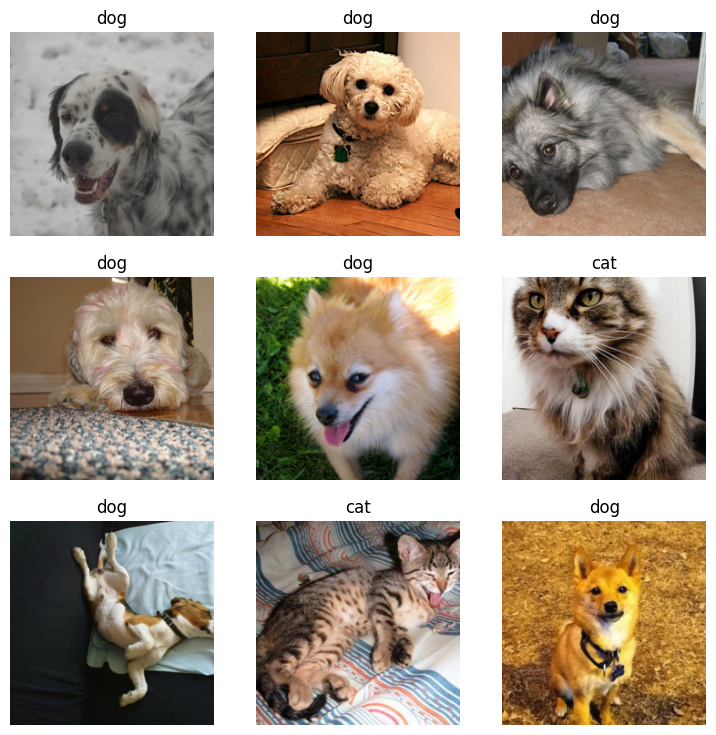

In [ ]:
dls.show_batch()

In [ ]:
learner = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 185MB/s]


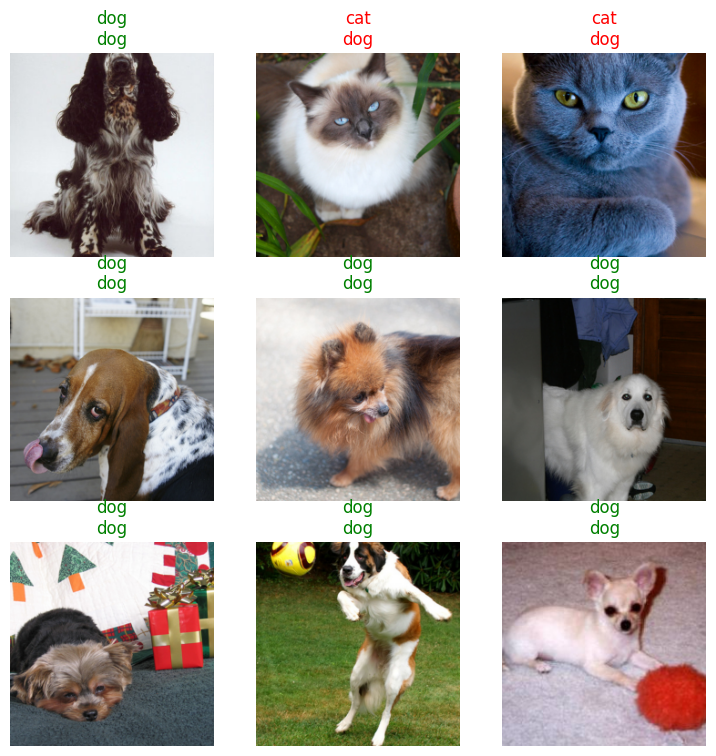

In [ ]:
learner.show_results()

In [ ]:
learner.validate()

(#2) [2.336956739425659,0.6617050170898438]

In [ ]:
learner.fine_tune(1)

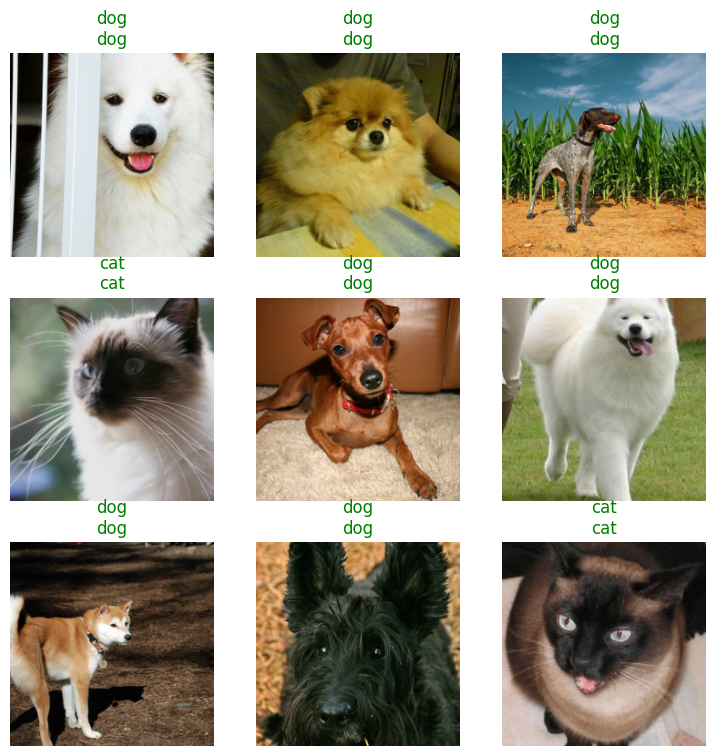

In [ ]:
learner.show_results()

In [ ]:
learner.validate()

(#2) [0.03306068480014801,0.989851176738739]

In [ ]:
dackel = ski.io.imread("https://upload.wikimedia.org/wikipedia/commons/0/03/Kurzhaardackel.jpg")

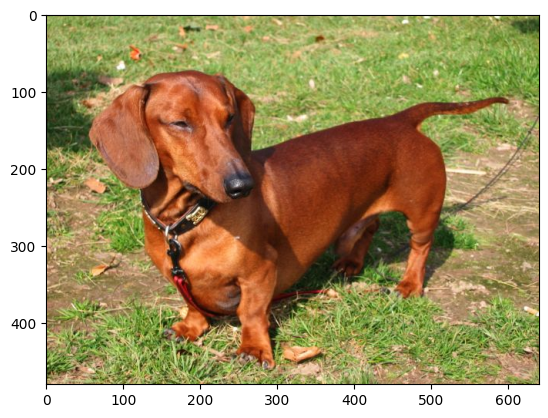

In [ ]:
plt.imshow(dackel)

In [ ]:
learner.predict(dackel)

('dog', tensor(1), tensor([2.2347e-06, 1.0000e+00]))

In [ ]:
interpret = ClassificationInterpretation.from_learner(learner)

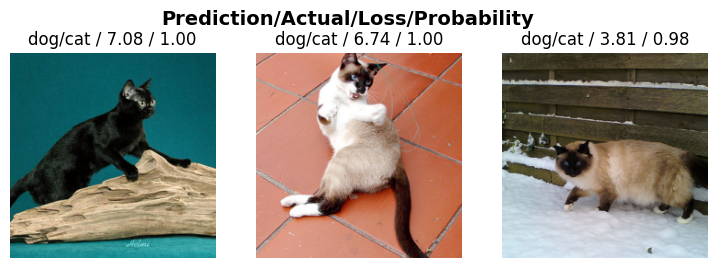

In [ ]:
interpret.plot_top_losses(3)

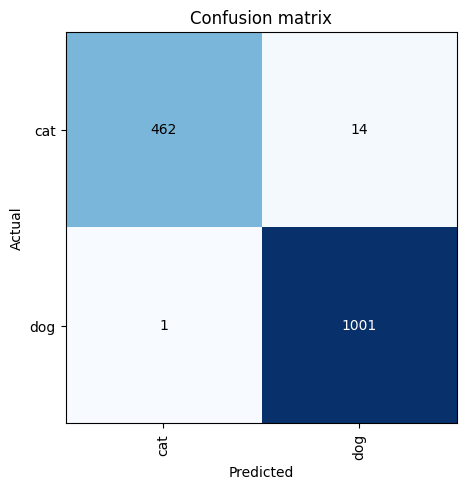

In [ ]:
interpret.plot_confusion_matrix()